In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from math import atan,sin,cos
from scipy.spatial import ConvexHull


Define map and obstacle in map as convex hull

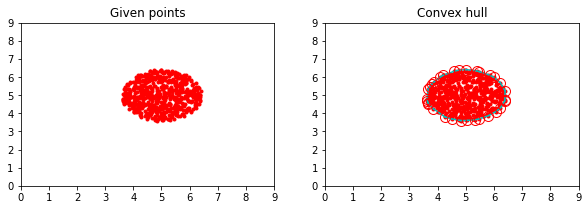

In [2]:
map_size=10
x=[]
y=[]
for i in range(10000):
        x.append(np.random.rand()*map_size)
        y.append(np.random.rand()*map_size)
# points = np.random.randint(0, 10, size=(100, 2))  # Random points in 2-D
obstacle=[[5,5]]
obstacle_points=[]
obstacle_radius=2
for i in range(len(x)):
#     plt.plot([x[i]], [y[i]], marker='o', markersize=1, color="blue")

    for j in (obstacle):
        
        [xa,ya]=j
        if (x[i]-xa)**2+(y[i]-ya)**2<=obstacle_radius:
#             occupancy[i]=1
            obstacle_points.append([x[i],y[i]])
points=np.array(obstacle_points)
hull = ConvexHull(points)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

for ax in (ax1, ax2):
    ax.plot(points[:, 0], points[:, 1], '.', color='red')
    if ax == ax1:
        ax.set_title('Given points')
    else:
        ax.set_title('Convex hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'c')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)
    ax.set_xticks(range(10))
    ax.set_yticks(range(10))
plt.show()

Generate a trajectory 

[[[4.492331632940077, 3.693792820508417], 3.518675738226888], [[4.268257696593888, 3.7907166942870605], 3.533352320892965], [[4.760540504185689, 3.6285314619281426], 3.568762029073223], [[4.825832263105595, 3.600024202673416], 3.5728645634681326], [[4.809346539799327, 3.640407350829383], 3.6012502529351975], [[4.654219288766735, 3.7233739613131323], 3.609252508992702], [[4.26747161783243, 3.8740373198230893], 3.6124644378841366], [[4.249115948227998, 3.90482891340981], 3.6363880318618986], [[4.400982726396552, 3.856280193251651], 3.638204168367235], [[4.723818460661229, 3.725322810860894], 3.640030935238064], [[4.521984310325297, 3.8212789262225186], 3.648067964420534], [[5.0057465528703835, 3.6095008867368894], 3.6675214095021955], [[5.041910588625274, 3.6079262985826843], 3.6843154503070874], [[4.889818605990385, 3.7005488931578356], 3.6915838365610276], [[4.7873309544268565, 3.774134145213237], 3.71137223562474], [[4.03858926181654, 4.064230388554765], 3.7349835558498135], [[5.02082

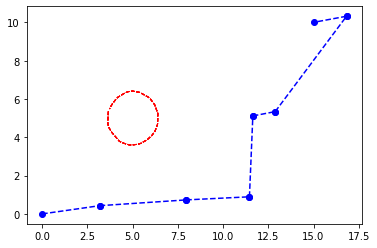

In [3]:

start=[0,0]
target=[15,10]
def get_nearest_obstacle(Pi,obstacle_points):
    distances=[]
    for point in obstacle_points:
        distances.append([point,distance(Pi,point)])
    distances.sort(key=lambda x:x[1])
    print(distances)
    return distances[0][0]

def distance(pointA,pointB):
    return np.sqrt((pointA[0]-pointB[0])**2+(pointA[1]-pointB[1])**2)
def get_nearest_five(pointA,pointB,hull,obstacle_points):
    yaw=atan((pointB[1]-pointA[1])/(pointB[0]-pointA[0]))
    waypoint=[]
    points=np.array(obstacle_points)
    plt.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'r--', lw=1, markersize=10)

#     plt.plot(points[:, 0], points[:, 1], '.', color='red')
#     angle_range=[-30,30]
    threshold=5
    coordinates=[]
    dist=distance(pointA,pointB)
    if dist>threshold:
        
        r=threshold
        x_point=pointA[0]+(np.random.rand()*r)
        y_point=pointA[1]+(np.random.rand()*r)
    else:
        r=dist
        x_point=pointB[0]
        y_point=pointB[1]
#     for i in range(5):
    while(distance([x_point,y_point],get_nearest_obstacle([x_point,y_point],obstacle_points)))<2:
        x_point=pointA[0]+(np.random.rand()*r)
        y_point=pointA[1]+(np.random.rand()*r)
    print([x_point,y_point])
    obstacle_point=[]
    if x_point>0 and y_point>0:
        obstacle_point+=obstacle_points
        obstacle_point.append([x_point,y_point])
        point=np.array(obstacle_point)
        hull_new=ConvexHull(point)
#         print(len(hull),len(hull_new))
        if hull!=hull_new:
            #no collision
            waypoint.append([x_point,y_point])
            print("no collision---->",x_point,y_point)
        else:
            print("collision---->",x_point,y_point)
            plt.plot([x_point], [y_point], '.', color='k')
    waypoint=np.array(waypoint)
    return waypoint
trajectory=[]
while distance(start,target)>1:
    trajectory.append(start)
    int_points=get_nearest_five(start,target,hull,obstacle_points)   

    max_dist=0
    
    for i in int_points:
#         plt.plot(i[:, 0], i[:, 1], 'o', color='green')
        print(i)
        if distance(start,i)>max_dist:
            x_max,y_max=i
            max_points=[x_max,y_max]
    # x1 = [1, 5]
    # y1 = [4, 1]
    print(start,max_points)
    # plt.plot([x_max], [y_max], '.', color='blue')
    x_values = [start[0], max_points[0]]
    y_values = [start[1], max_points[1]]
    plt.plot(x_values, y_values, 'bo', linestyle="--")
    start=max_points
trajectory.append(target)    


In [4]:
print(trajectory)

[[0, 0], [3.1783700137550657, 0.42965682240796443], [7.9630893009425465, 0.7314794981263018], [11.455810348499535, 0.8932975143000904], [11.644287316255365, 5.1148267587526], [12.878311749384519, 5.339605985023041], [16.822624726478637, 10.318865485377946], [15, 10]]


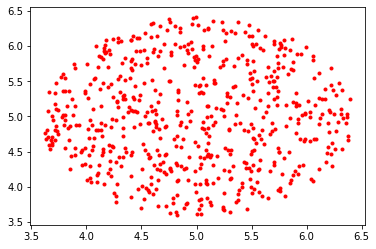

In [5]:
points=np.array(obstacle_points)
plt.plot(points[:, 0], points[:, 1], '.', color='red')
plt.show()

Waypoints [array([3.17837001, 0.42965682]), array([7.9630893, 0.7314795]), array([11.45581035,  0.89329751]), array([11.64428732,  5.11482676]), array([12.87831175,  5.33960599]), array([16.82262473, 10.31886549]), array([15., 10.])]
7


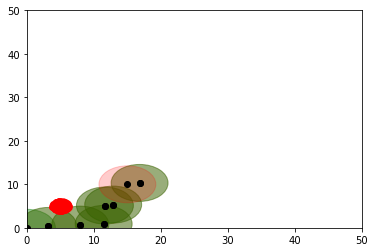

In [6]:
def compute_balancing_force(Q_old,Q_new,F_old):
    F_new=Q_new-Q_old
    N_new=F_old-F_new
    return N_new
def generate_bubble(Pi):#bisection
    r_min=2
    r_max=5
#     max_iter=100
    r=0
    while r_max-r_min>1:
        r=0.5*(r_min+r_max)
        objective=cp.Minimize(r)
        constraints=[]
        for obstacles in obstacle_points:
            constraints.append(cp.norm(obstacles-Pi,2)>=r)
        prob=cp.Problem(objective,constraints)
        if prob.status=="optimal":
            r_max=r
        else:
            r_min=r
#         print(r_min,r_max,r)
    
    return [Pi,r]
def compute_norm(x,order=None):
    return np.linalg.norm(x, ord=order)

trajectory=np.array(trajectory)
current_index=0
current_pose=trajectory[current_index]
radius=2
bubble=np.zeros((2,len(trajectory)))
target_pose=trajectory[-1]
ax = plt.gca()

ax.set_xlim((0, 50))
ax.set_ylim((0, 50))
# for i in O:
#     obs_plot=plt.Circle(i, 2, color='b', alpha=0.2)

#     ax.plot(i,2, 'o', color='m',alpha=0.4)
waypoints=[]
points=np.array(obstacle_points)

plt.plot(points[:, 0], points[:, 1], '.', color='red')

while compute_norm(current_pose-target_pose,2)>0.5*radius:
#     print(current_index)
    current_pose=trajectory[current_index]
#     waypoints.append(current_pose)
    next_target=trajectory[current_index+1]
    current_bubble=generate_bubble(current_pose)
    next_bubble=generate_bubble(next_target)
#     print("current bubble",current_bubble,"next bubble",next_bubble)
    current_plot=plt.Circle(current_bubble[0], current_bubble[1], color='g', alpha=0.4)
    next_plot=plt.Circle(next_bubble[0], next_bubble[1], color='r', alpha=0.2)
    ax.add_patch(current_plot)
    ax.add_patch(next_plot)
    ax.plot((current_bubble[0][0]),(current_bubble[0][1]), 'o', color='k')
    ax.plot((next_bubble[0][0]),(next_bubble[0][1]) ,'o', color='k')
       
    
#     print(next_bubble[1]+current_bubble[1],compute_norm(current_pose-next_target,2))
    if next_bubble[1]+current_bubble[1]>compute_norm(current_pose-next_target,2) and next_target[1]>1.5*radius:
        next_bubble=current_bubble
#         theta=compute_balancing_force(Q_old,Q_new,F_old)
        waypoints.append(next_target)
    else:
        query_pose=current_pose
        query_bubble=current_bubble
        while next_bubble[1]+query_bubble[1]<=compute_norm(query_pose-next_target,2):
            query_pose=(query_pose+next_target)*0.5
            query_bubble=generate_bubble(query_pose)
            query_plot=plt.Circle(query_bubble[0], query_bubble[1], color='b', alpha=0.2)
#             print("intermediate bubble",query_bubble)
            waypoints.append(query_pose)
            ax.add_patch(query_plot)

        waypoints.append(next_target)
    current_index+=1
    if current_index==len(trajectory)-1:
        break

print("Waypoints",waypoints)
print(len(waypoints))




        